In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

In [2]:
df_smote = pd.read_csv("hmeq_SMOTE.csv")

In [3]:
df_smote.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,TARGET
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.000000,34.818262,1,0,1,0,0,0,1
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.000000,34.818262,1,0,1,0,0,0,1
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.000000,34.818262,1,0,1,0,0,0,1
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,0.0,21.296096,34.818262,0,0,1,0,0,0,1
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.000000,34.818262,1,1,0,0,0,0,0


In [4]:
# train-test split
X = df_smote.drop('TARGET',axis=1)

In [5]:
y = df_smote['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)

In [9]:
scaled_X_test = scaler.transform(X_test)

In [10]:
# Using combination of LogisticRegression & GridSearchCV

In [11]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [12]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,1,20)

param_grid = {'penalty':penalty,
             'l1_ratio':l1_ratio,
             'C':C}

In [13]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

In [15]:
# best parameters
grid_model.best_params_

{'C': 1.128837891684689, 'l1_ratio': 1.0, 'penalty': 'l1'}

In [16]:
best_model = grid_model.best_estimator_

In [17]:
# model coefficients
coefficients = best_model.coef_
coefficients

array([[-0.26473865, -0.18543325,  0.25381191, -0.14930729,  0.6202499 ,
         1.24815932, -0.41163473,  0.31975347, -0.26191322,  0.51545564,
        -0.0774264 , -0.8808259 , -0.7633784 , -0.69832352, -0.17792427,
        -0.23811188]])

In [18]:
coefs = pd.Series(index=X.columns, data=coefficients[0])

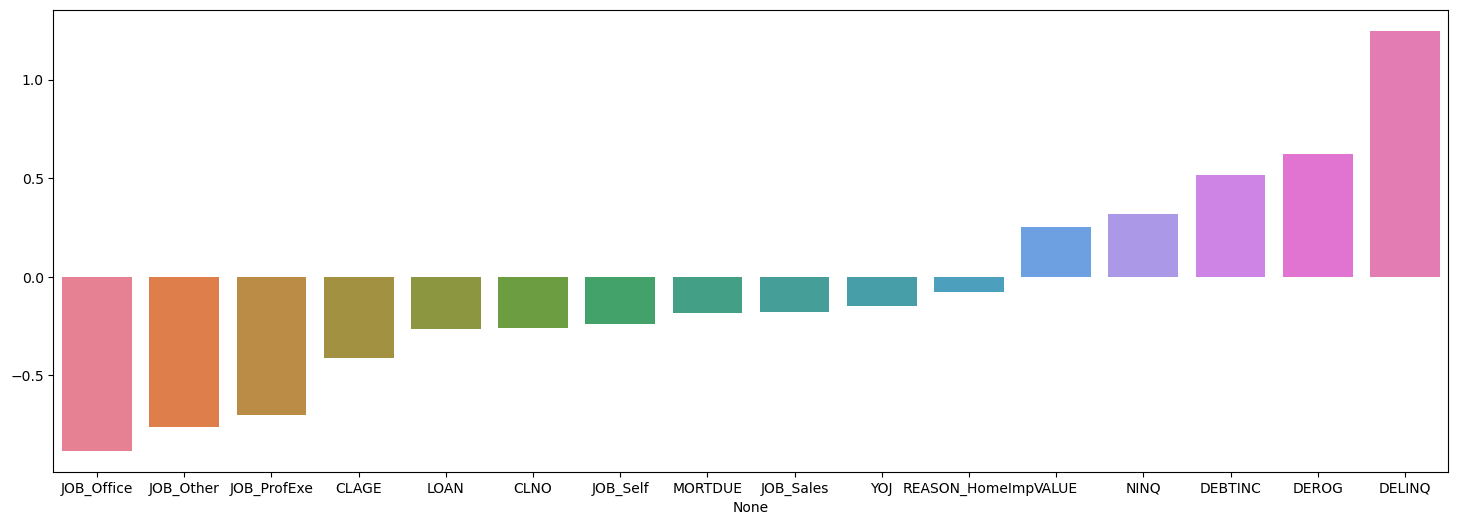

In [31]:
coefs = coefs.sort_values()
plt.figure(figsize=(18,6))
sns.barplot(x=coefs.index, y=coefs.values, hue=coefs.index)
plt.show()

In [33]:
y_pred = grid_model.predict(scaled_X_test)

In [35]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [37]:
confusion_matrix(y_test,y_pred)

array([[377,  87],
       [111, 380]], dtype=int64)

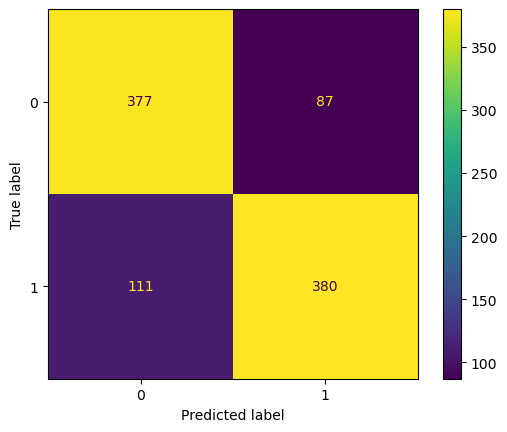

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       464
           1       0.81      0.77      0.79       491

    accuracy                           0.79       955
   macro avg       0.79      0.79      0.79       955
weighted avg       0.79      0.79      0.79       955



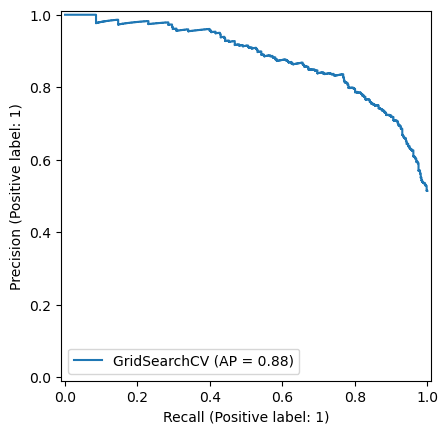

In [43]:
PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test)

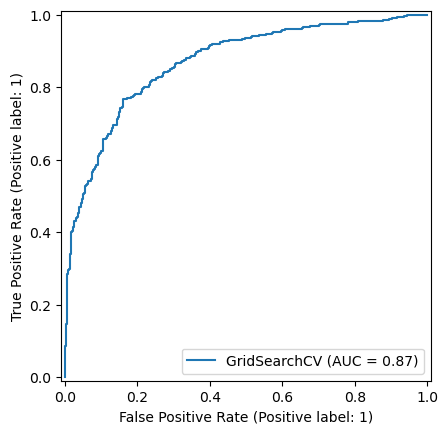

In [45]:
RocCurveDisplay.from_estimator(grid_model, scaled_X_test, y_test)